In [ ]:
#tratamiento de duplicados

#elliminar ducplicados si es que todos los registros son duplicados
notas.drop_duplicates(subset=None, keep='firts')
notas.drop_duplicates(subset=None, keep='last')
#eliminar ducplicados si es que la variable subset esta duplicada
notas.drop_duplicates(subset='Estudiente',keep='firts')
notas.drop_duplicates(subsets='Estudiante',kepp='last')
#Groupby
notas.groupby(['Estdiante']).max()
notas.groupby(['Estudiante']).min()
notas.groupby(['Estudiante']).mean()
notas.groupby(['Estudiante']).mena().loc('Maria')


#solucionando duplicados
notas_nodup = notas.drop_duplicates(subset='Estudiante',keep='first')
#cruzando nuevamente
cruce_ok= pd_merge(notas3,notas_nodup,on='Estudienate')
notas3.shape
notas_nodup.shape
cruce_ok.shape

#visualizaciones de datos

In [1]:
#Importando libreria
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
import sklearn as datasets


In [7]:
#importando las base de datos
path = "/content/countryGDP.csv"
data = pd.read_csv(path)
#visualizacion de los datos descripcion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [8]:
data.describe()

,Population,GDP per Capita
count,1.960000e+02,176.000000
mean,3.722825e+07,12882.556131
std,1.399655e+08,17747.141203
min,1.022200e+04,277.068309
25%,1.638278e+06,1781.096847
50%,7.450124e+06,5233.583395
75%,2.557454e+07,15494.683646
max,1.371220e+09,101449.968168


#Tratamiento de los missing

###cuantificar la existencia de missing


son aquellos que son 
- NAN : NOT NUMBER
- NA not avaible

In [9]:
#En terminos relativos y en terminos absolutos
data.isnull()# pregunta si son missing o no lo son


,Country,Code,Population,GDP per Capita
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
196,False,False,False,False
197,False,False,False,True
198,False,False,False,False
199,False,False,False,False


In [10]:
np.sum(data.isnull())#comienza a contar cuandot datos sonj missing
#missing por columnas

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

In [11]:
np.sum(data.isnull(),axis=1)# missing por filas

0      0
1      0
2      0
3      1
4      1
      ..
196    0
197    1
198    0
199    0
200    0
Length: 201, dtype: int64

In [12]:
#En terminos relativos
np.mean(data.isnull())#calculamos la probabilidad de que sea missing , proporcion 

Country           0.000000
Code              0.000000
Population        0.024876
GDP per Capita    0.124378
dtype: float64

In [13]:
np.mean(data.isnull(),axis=1)# para que eme indique la probabilidad o proporcion de missing por filas

0      0.00
1      0.00
2      0.00
3      0.25
4      0.25
       ... 
196    0.00
197    0.25
198    0.00
199    0.00
200    0.00
Length: 201, dtype: float64

#Assignación de los Missing


- Las formas mas tradicionalesson asignar , valor promedio , mnediana, formas expertas

- Criterios como especialista en funcion del conocimeinto de la base de datos


In [22]:
l1 = [[np.sum(data.isnull())],[np.mean(data.isnull())]]
l1

[[Country            0
  Code               0
  Population         5
  GDP per Capita    25
  dtype: int64], [Country           0.000000
  Code              0.000000
  Population        0.024876
  GDP per Capita    0.124378
  dtype: float64]]

In [24]:
data1= data['GDP per Capita'].dropna()
data1

0        594.323081
1       3945.217582
2       4206.031232
5       4101.472152
6      13714.731962
           ...     
194     2805.314644
196     2111.138024
198     1406.291651
199     1304.879014
200      924.143819
Name: GDP per Capita, Length: 176, dtype: float64

In [25]:
np.sum(data1.isnull())

0

In [29]:
data.Population.fillna(np.mean(data.Population),inplace=True)
np.sum(data.isnull())

Country            0
Code               0
Population         0
GDP per Capita    25
dtype: int64

#Graficos
###Histogramas

(array([117.,  25.,  10.,   6.,   9.,   4.,   1.,   3.,   0.,   1.]),
 array([   277.06830917,  10394.35829506,  20511.64828095,  30628.93826683,
         40746.22825272,  50863.51823861,  60980.80822449,  71098.09821038,
         81215.38819627,  91332.67818215, 101449.96816804]),
 <a list of 10 Patch objects>)

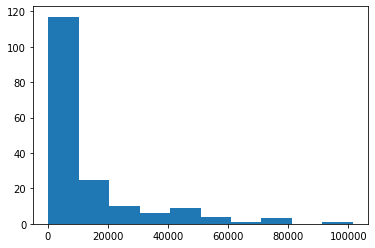

In [31]:
historgrama = plt.hist(data1)
historgrama

###Personalización de graficos


(array([89., 28., 13., 11.,  6.,  4.,  2.,  3.,  9.,  1.,  3.,  2.,  1.,
         0.,  2.,  0.,  1.,  0.,  0.,  0.]),
 array([   277.06830917,   5277.06830917,  10277.06830917,  15277.06830917,
         20277.06830917,  25277.06830917,  30277.06830917,  35277.06830917,
         40277.06830917,  45277.06830917,  50277.06830917,  55277.06830917,
         60277.06830917,  65277.06830917,  70277.06830917,  75277.06830917,
         80277.06830917,  85277.06830917,  90277.06830917,  95277.06830917,
        100277.06830917]),
 <a list of 20 Patch objects>)

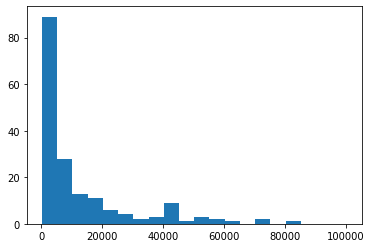

In [34]:
b = np.arange(data1.min(),data1.max(),5000)
plt.hist(data1,bins=b)

(array([67., 34., 16., 11.,  9.,  5.,  5.,  2.,  3.,  1.,  2.,  3.,  6.,
         1.,  2.,  2.,  2.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([   277.06830917,   3649.49830447,   7021.92829976,  10394.35829506,
         13766.78829035,  17139.21828565,  20511.64828095,  23884.07827624,
         27256.50827154,  30628.93826683,  34001.36826213,  37373.79825742,
         40746.22825272,  44118.65824802,  47491.08824331,  50863.51823861,
         54235.9482339 ,  57608.3782292 ,  60980.80822449,  64353.23821979,
         67725.66821508,  71098.09821038,  74470.52820568,  77842.95820097,
         81215.38819627,  84587.81819156,  87960.24818686,  91332.67818215,
         94705.10817745,  98077.53817275, 101449.96816804]),
 <a list of 30 Patch objects>)

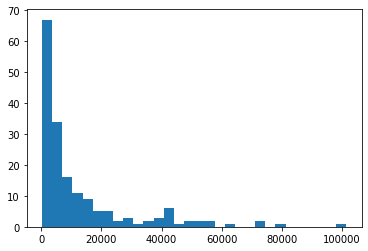

In [36]:
#cuado le decimos el nuemo de barras
plt.hist(data1,bins= 30)

(array([29., 20., 11., 14., 13., 30., 24.]),
 array([    0,  1000,  2000,  3000,  4000,  5000, 10000, 20000]),
 <a list of 7 Patch objects>)

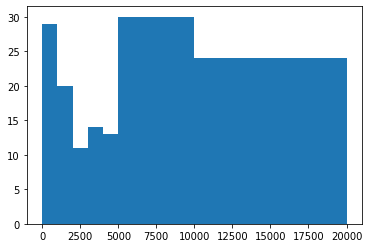

In [38]:
#personalizar tus barras
c = [0,1000,2000,3000,4000,5000,10000,20000]#definimo los cortes de nuestar grafica
plt.hist(data1,bins = c)

(array([49., 92.]), array([    0,  2000, 20000]), <a list of 2 Patch objects>)

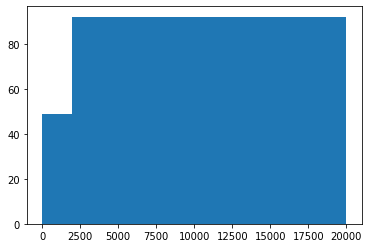

In [41]:
d = np.array([0, 2000,20000])
plt.hist(data1,bins=d)

(array([53., 28., 15., 10., 11.,  4.,  9.,  6.,  4.,  2.,  1.,  4.,  1.,
         1.,  3.,  1.,  0.,  2.,  1.,  2.,  3.,  4.,  0.,  0.,  2.,  1.,
         1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   277.06830917,   2300.52630635,   4323.98430353,   6347.4423007 ,
          8370.90029788,  10394.35829506,  12417.81629224,  14441.27428941,
         16464.73228659,  18488.19028377,  20511.64828095,  22535.10627812,
         24558.5642753 ,  26582.02227248,  28605.48026965,  30628.93826683,
         32652.39626401,  34675.85426119,  36699.31225836,  38722.77025554,
         40746.22825272,  42769.6862499 ,  44793.14424707,  46816.60224425,
         48840.06024143,  50863.51823861,  52886.97623578,  54910.43423296,
         56933.89223014,  58957.35022732,  60980.80822449,  63004.26622167,
         65027.72421885,  67051.18221603,  69074.6402132 ,  71098.09821038,
         73121.55620756,  75145.

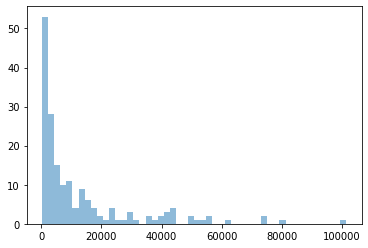

In [42]:
plt.hist(data1,bins =50,alpha=0.5)#esto es para poner una grafico de manera translucida


(array([53., 28., 15., 10., 11.,  4.,  9.,  6.,  4.,  2.,  1.,  4.,  1.,
         1.,  3.,  1.,  0.,  2.,  1.,  2.,  3.,  4.,  0.,  0.,  2.,  1.,
         1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   277.06830917,   2300.52630635,   4323.98430353,   6347.4423007 ,
          8370.90029788,  10394.35829506,  12417.81629224,  14441.27428941,
         16464.73228659,  18488.19028377,  20511.64828095,  22535.10627812,
         24558.5642753 ,  26582.02227248,  28605.48026965,  30628.93826683,
         32652.39626401,  34675.85426119,  36699.31225836,  38722.77025554,
         40746.22825272,  42769.6862499 ,  44793.14424707,  46816.60224425,
         48840.06024143,  50863.51823861,  52886.97623578,  54910.43423296,
         56933.89223014,  58957.35022732,  60980.80822449,  63004.26622167,
         65027.72421885,  67051.18221603,  69074.6402132 ,  71098.09821038,
         73121.55620756,  75145.

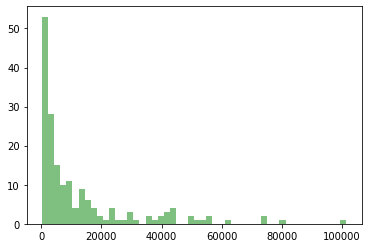

In [44]:
#para cambiar el color
plt.hist(data1, bins =50,alpha= 0.5, color='green')

(array([53., 28., 15., 10., 11.,  4.,  9.,  6.,  4.,  2.,  1.,  4.,  1.,
         1.,  3.,  1.,  0.,  2.,  1.,  2.,  3.,  4.,  0.,  0.,  2.,  1.,
         1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   277.06830917,   2300.52630635,   4323.98430353,   6347.4423007 ,
          8370.90029788,  10394.35829506,  12417.81629224,  14441.27428941,
         16464.73228659,  18488.19028377,  20511.64828095,  22535.10627812,
         24558.5642753 ,  26582.02227248,  28605.48026965,  30628.93826683,
         32652.39626401,  34675.85426119,  36699.31225836,  38722.77025554,
         40746.22825272,  42769.6862499 ,  44793.14424707,  46816.60224425,
         48840.06024143,  50863.51823861,  52886.97623578,  54910.43423296,
         56933.89223014,  58957.35022732,  60980.80822449,  63004.26622167,
         65027.72421885,  67051.18221603,  69074.6402132 ,  71098.09821038,
         73121.55620756,  75145.

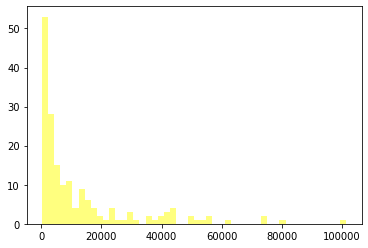

In [45]:
plt.hist(data1, bins =50,alpha= 0.5, color='yellow')

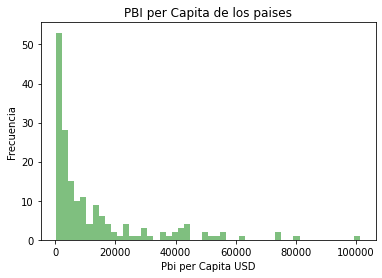

In [46]:
plt.hist(data1, bins =50,alpha= 0.5, color= 'green')
plt.title('PBI per Capita de los paises')
plt.xlabel('Pbi per Capita USD')
plt.ylabel('Frecuencia')
plt.show()

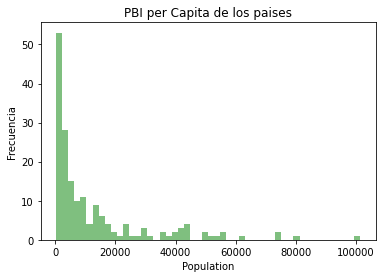

In [50]:
def grafico(variable):
  plt.hist(data1, bins =50,alpha= 0.5, color= 'green')
  plt.title('PBI per Capita de los paises')
  plt.xlabel(variable)
  plt.ylabel('Frecuencia')
  plt.show()

grafico('Population')

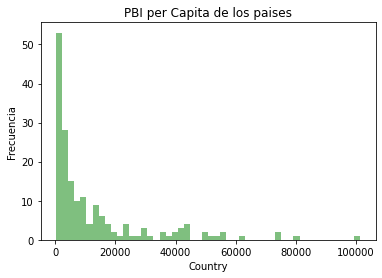

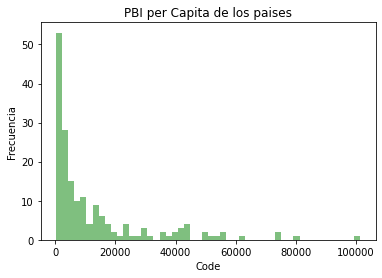

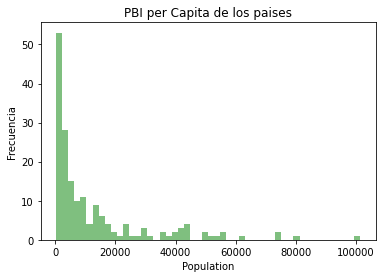

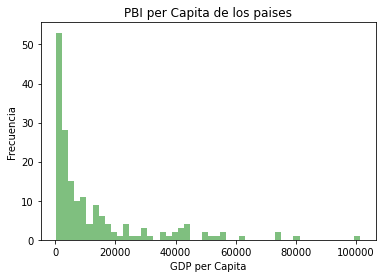

In [63]:
#obtenemos los graficos de cada columna

k = np.array(data.columns)
for i in k:
  grafico(i)

#Usando otras librerias


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


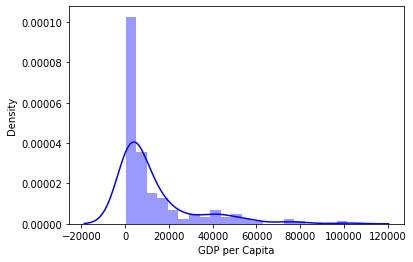

In [64]:
sns.distplot(data1,hist=True, kde =True, color= 'blue')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


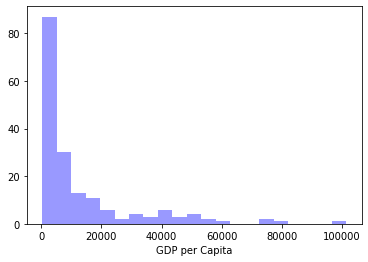

In [66]:
sns.distplot(data1,hist=True,kde = False, color= 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


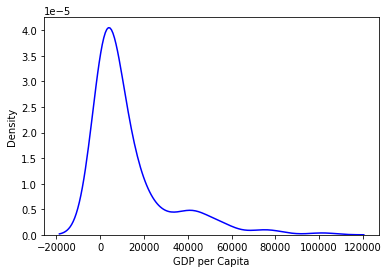

In [67]:
sns.distplot(data1,hist=False,kde =True, color= 'blue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


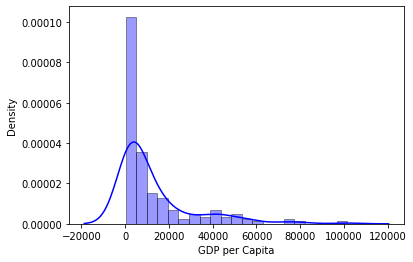

In [68]:
sns.distplot(data1, hist= True, kde = True,color='blue',hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


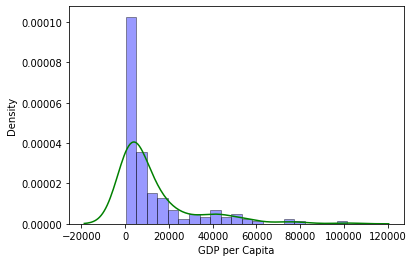

In [72]:
sns.distplot(data1, hist= True, kde = True,color='blue',hist_kws={'edgecolor':'black'},kde_kws={'color':'green'})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


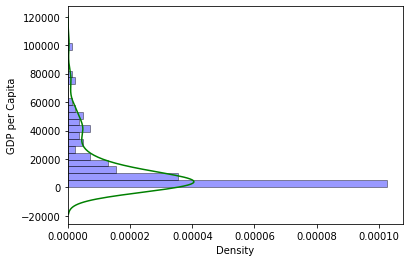

In [73]:
sns.distplot(data1, hist= True, kde = True,color='blue',hist_kws={'edgecolor':'black'},kde_kws={'color':'green'},vertical=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff405930d10>,
      dtype=object)

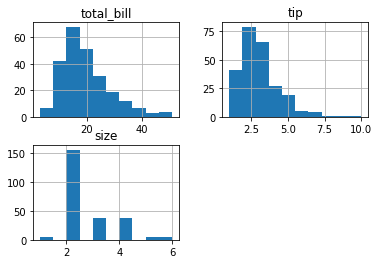

In [74]:
#descargando la base de datos
tips= sns.load_dataset('tips')
tips.hist()

In [76]:
#analisis multivariado
tips.smoker.value_counts()


No     151
Yes     93
Name: smoker, dtype: int64

In [77]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

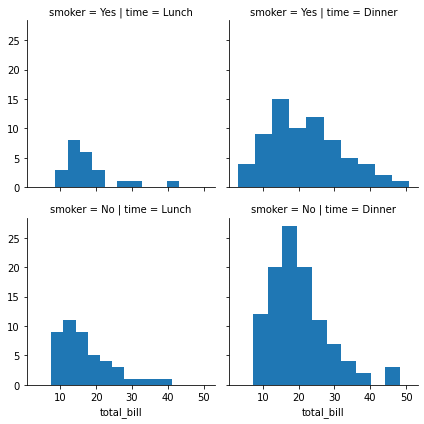

In [79]:
#generando graficos
g = sns.FacetGrid(tips,row='smoker',col='time')
g.map(plt.hist, 'total_bill')

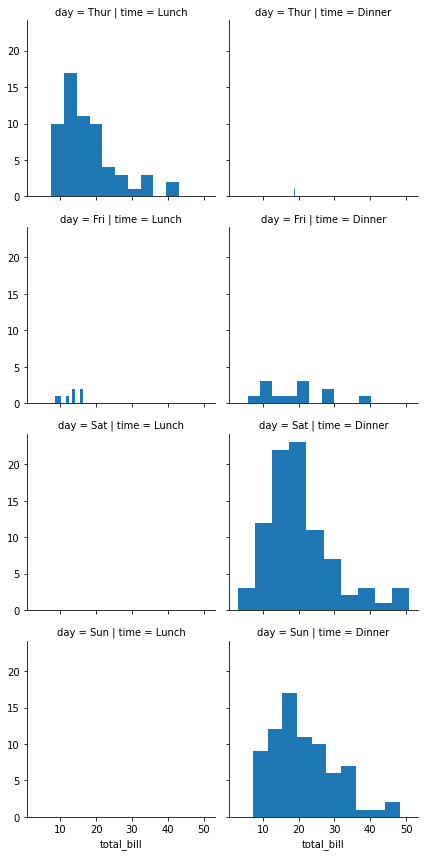

In [80]:
g = sns.FacetGrid(tips,row='day',col='time')
g.map(plt.hist,'total_bill')

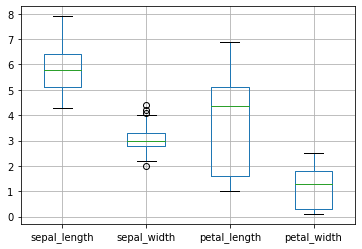

In [81]:
#boxplot desde un punto de vista univariado
iris=sns.load_dataset('iris')
iris.boxplot()
#valores que estan encima de estos bigotes son llamados outliers

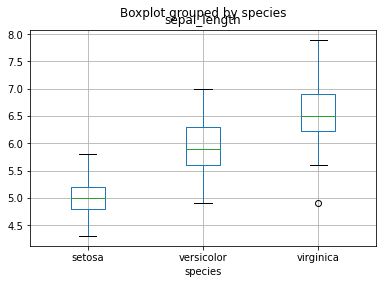

In [82]:
#analisis multivariado
iris.boxplot(column='sepal_length',by ='species')

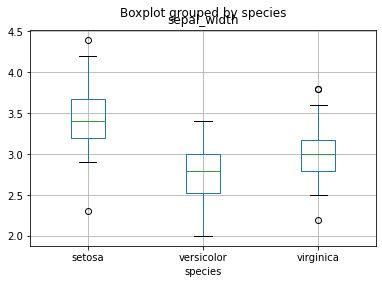

In [83]:
iris.boxplot(column='sepal_width',by ='species')

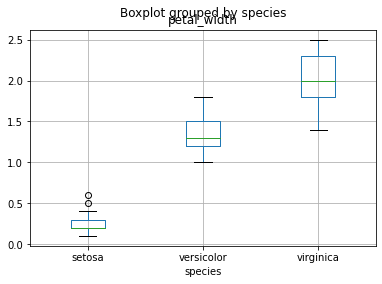

In [84]:
iris.boxplot(column='petal_width',by ='species')

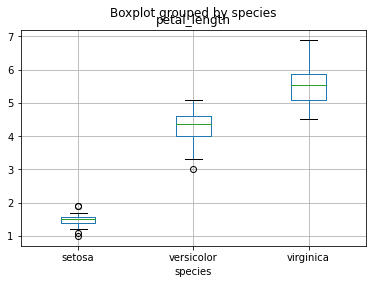

In [85]:
iris.boxplot(column='petal_length',by ='species')

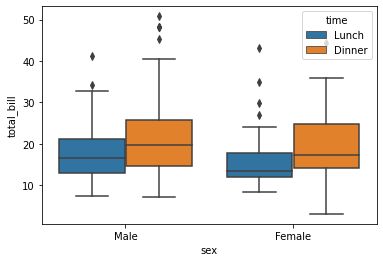

In [94]:
sns.boxplot(x ='sex',y='total_bill',hue='time',data=tips)


In [99]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

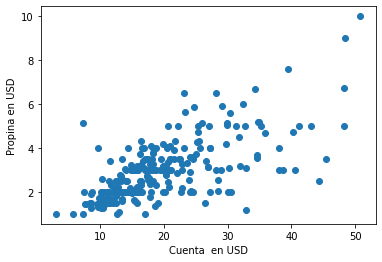

In [101]:
plt.scatter(tips['total_bill'],tips['tip'])
plt.xlabel('Cuenta  en USD')
plt.ylabel('Propina en USD')
plt.show()

In [102]:
tips[['total_bill','tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


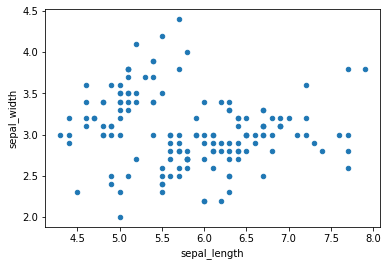

In [106]:
iris.plot(kind='scatter',x ='sepal_length',y='sepal_width')
iris[['sepal_length','sepal_width']].corr()

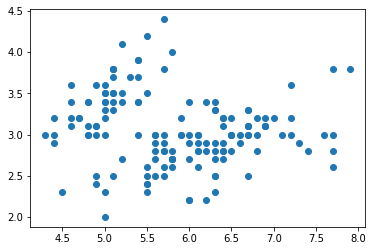

In [107]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


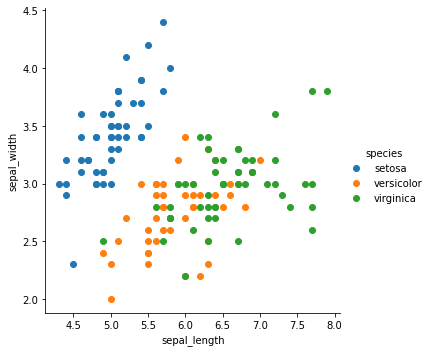

In [108]:
g = sns.FacetGrid(iris,hue='species',size=5)
g.map(plt.scatter,'sepal_length','sepal_width').add_legend()

In [109]:
iris[iris.species=='setosa'][['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.000000,0.742547
sepal_width,0.742547,1.000000


In [110]:
iris[iris.species=='versicolor'][['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.000000,0.525911
sepal_width,0.525911,1.000000


In [111]:
iris[iris.species=='virginica'][['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.000000,0.457228
sepal_width,0.457228,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3ff729810>,
      dtype=object)

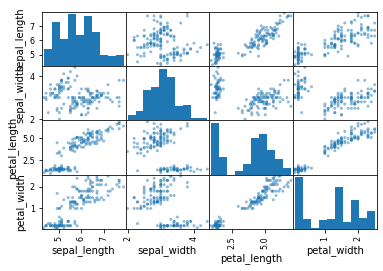

In [114]:

from pandas.plotting import scatter_matrix
scatter_matrix(iris)